In [1]:
import numpy as np
import pandas as pd
from functools import partial
from importlib import reload
import copy
import funcOb
import testUtils
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [240]:
import numpy as np
import matplotlib.pyplot as plt
change = 0.001
jitter = 1e-9
pow = 0.95
mult = 0.01
a = np.array([0.99,0.28])
b = np.array([0.1,0.3])
#a = 2 * (a>=2).astype(int) -1

start = mult * abs(a-b)**pow
end = mult * abs((a+change) - b)**pow

grad = np.sign(a-b) * mult * (pow * np.abs(a-b)**pow) / np.abs(a-b)
grad_scaled = grad * change
actual = end - start

print(actual)
print(grad_scaled)

print((actual - grad_scaled)/change)

[ 9.55524683e-06 -1.15670969e-05]
[ 9.55551514e-06 -1.15523970e-05]
[-2.68307853e-07 -1.46998850e-05]


In [335]:
a = np.array([1,2])
-a

array([-1, -2])

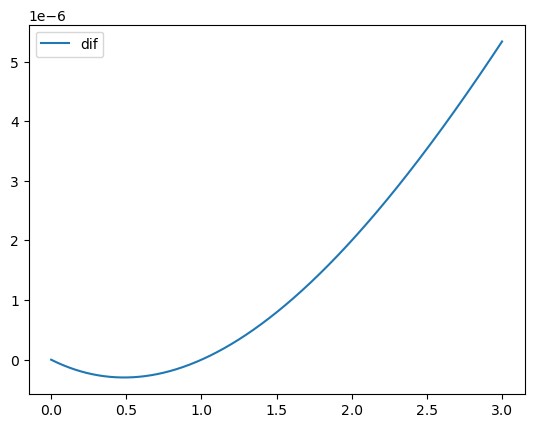

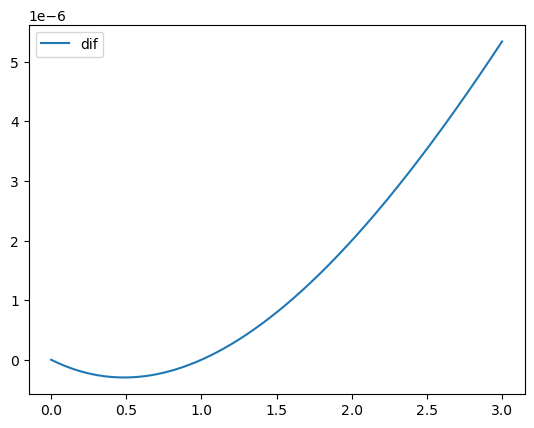

In [334]:
pows = np.linspace(0,3,1000)
actuals_0 = list()
actuals_1 = list()
grad_preds_0 = list()
grad_preds_1 = list()
change = 0.001
mult = 2
a = np.array([0.1,0.99])
b = np.array([0.99,0.1])

for pow in pows:

    start = mult * np.abs(a-b)**pow
    end = mult * np.power(np.abs((a+change) - b), pow)
    actuals_0.append(end[0] - start[0])
    actuals_1.append(end[1] - start[1])

    grad = mult * pow * np.power(np.abs(a - b), pow-2) * (a-b)
    grad_scaled = grad * change
    grad_preds_0.append(grad_scaled[0])
    grad_preds_1.append(grad_scaled[1])


#plt.plot(pows, np.array(actuals_0), label = 'actual')
#plt.plot(pows, np.array(grad_preds_0), label = 'grad_pred')
plt.plot(pows, np.array(actuals_0) - np.array(grad_preds_0), label = 'dif')
#plt.ylim(-0.3,0.1)
plt.legend()
plt.show()

#plt.plot(pows, np.array(actuals_1), label = 'actual')
#plt.plot(pows, np.array(grad_preds_1), label = 'grad_pred')
plt.plot(pows, np.array(actuals_1) - np.array(grad_preds_1), label = 'dif')
#plt.ylim(-0.3,0.1)
plt.legend()
plt.show()




In [35]:
grad

array([-4.88, -2.8 ])

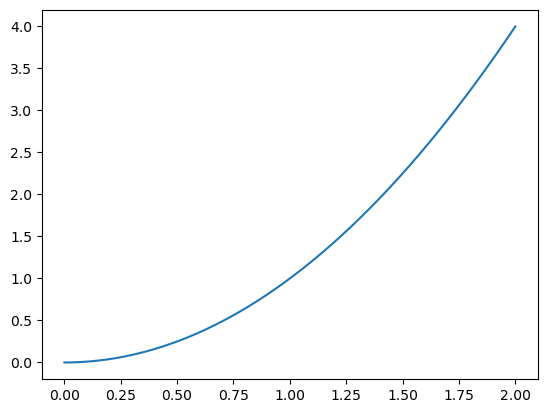

In [25]:
x = np.linspace(0,2,1000)
y = x**2

plt.plot(x,y)

In [2]:
from TunaSims import TunaSmoothSim

testy = TunaSmoothSim()

In [5]:
testy.query = demo_query
testy.prec_query = demo_query_prec
testy.target = demo_target
testy.target_prec = demo_target_prec

In [12]:
a = np.array([0,2,3])

a/sum(a)

array([0. , 0.4, 0.6])

Show that Sims are in funtion space

In [4]:
demo_matches = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/metlinGnps_NIST20_matchedPol/intermediateOutputs/splitMatches/train/10_ppm/chunk_1.pkl')
demo_matches_test = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/metlinGnps_NIST20_matchedPol/intermediateOutputs/splitMatches/train/10_ppm/chunk_2.pkl')
demo_query = demo_matches.iloc[0]['query']
demo_target = demo_matches.iloc[0]['target']
demo_query_prec = demo_matches.iloc[0]['precquery']
demo_target_prec = demo_matches.iloc[0]['prectarget']

In [ ]:
manhattan_tuna = tuna_sim(demo_query,
              demo_target,
              demo_query_prec,
              demo_target_prec,
              dif_a = 1,
              dif_b = 1,
              unnormed = 1)

dot_tuna = tuna_sim(demo_query,
              demo_target,
              demo_query_prec,
              demo_target_prec,
              mult_a = 1,
              mult_b = 2,
              collapsed = 1,
              mult_norm_a= 1,
              mult_norm_b= 2,
              sim_flip=True)

harmonic_tuna = tuna_sim(demo_query,
              demo_target,
              demo_query_prec,
              demo_target_prec,
              mult_a = 1,
              mult_b = 1,
              expanded = 2,
              add_norm_a= 1,
              add_norm_b= 1,
              sim_flip=True)

demo_query[:,1] /= sum(demo_query[:,1])
demo_target[:,1] /= sum(demo_target[:,1])
combined_old = tools.match_peaks_in_spectra(demo_query, demo_target, ms2_da=0.05)
manhattan = 1 - tools.sigmoid(math_distance.manhattan_distance(combined_old[:,1], combined_old[:,2]))
dot_product = tools.sigmoid(1 - math_distance.dot_product_nosqrt_distance(combined_old[:,1], combined_old[:,2]))
harmonic_mean = tools.sigmoid(1 - math_distance.harmonic_mean_distance(combined_old[:,1], combined_old[:,2]))

print(f'manhattan: {abs(manhattan - manhattan_tuna)}')
print(f'dot_product: {abs(dot_product - dot_tuna)}')
print(f'harmonic_mean: {abs(harmonic_mean - harmonic_tuna)}')

Can we recover similarity function from scores and input vectors alone, which training strategies are best?

First We will do no funny biz with cleaning

In [ ]:

func_skeletons = [
    funcOb.func_ob(
    name = "10k_iter",
    sim_func = partial(tuna_sim),
    init_vals= 0.1,
    params = None,
    tol = 0,
    lambdas= 1,
    max_iter = 10000,
    epsilon = 1e-5),
    funcOb.func_ob(
    name = "10k_iter_1e3",
    sim_func = partial(tuna_sim),
    init_vals= 0.1,
    params = None,
    tol = 0,
    lambdas= 1,
    max_iter = 10000,
    epsilon = 1e-3),
    funcOb.func_ob(
    name = "10k_iter_1.2boost",
    sim_func = partial(tuna_sim),
    init_vals= 0.1,
    params = None,
    tol = 0,
    lambdas= 1,
    max_iter = 10000,
    epsilon = 1e-5,
    zero_grad_epsilon_boost = 1.2)
]
  

params = {
    "None":[],
    "dif_only": ['unnormed','dif_a','dif_b'],
    "dif_and_mult": ['unnormed','dif_a','dif_b','mult_a','mult_b'],
    "collapsed": ['collapsed','dif_a','dif_b','mult_a','mult_b', 'mult_norm_a','mult_norm_b'],
    "expanded": ['expanded','dif_a','dif_b','mult_a','mult_b', 'add_norm_a', 'add_norm_b'],
    # "collapsed_and_unnorm": ['unnormed', 'collapsed','dif_a','dif_b','mult_a','mult_b','mult_norm_a','mult_norm_b', 'add_norm_a', 'add_norm_b'],
    # "expanded_and_unnorm": ['unnormed', 'expanded','dif_a','dif_b','mult_a','mult_b', 'add_norm_a', 'add_norm_b']  
}

params_dict = dict()
for key, value in params.items():
    # params_dict[f'{key}__clean'] = np.array(value+['query_max_mz_fix',
    #                                            'target_max_mz_fix', 
    #                                            'query_fixed_noise', 
    #                                            'target_fixed_noise',
    #                                             'query_var_noise',
    #                                             'target_var_noise',
    #                                             'query_fixed_power',
    #                                             'target_fixed_power'])
    
    params_dict[f'{key}__reweight'] = np.array(value+['query_fixed_power',
                                            'query_mz_power',
                                            'query_ent_power',
                                            'target_fixed_power',
                                            'target_mz_power',
                                            'target_ent_power',
                                            'query_reweight_offset',
                                            'target_reweight_offset'])
    
    # params_dict[f'{key}__clean__reweight'] = np.array(value+['query_max_mz_fix',
    #                                            'target_max_mz_fix', 
    #                                            'query_fixed_noise', 
    #                                            'target_fixed_noise',
    #                                             'query_var_noise',
    #                                             'target_var_noise',
    #                                             'query_fixed_power',
    #                                             'target_fixed_power',
    #                                             'query_fixed_power',
    #                                             'query_mz_power',
    #                                             'query_ent_power',
    #                                             'target_fixed_power',
    #                                             'target_mz_power',
    #                                             'target_ent_power',
    #                                             'query_reweight_offset',
    #                                             'target_reweight_offset'])
    
# params.update(new_dict)

Need to turn this into an easy way to generate labels

In [ ]:

manhattan_tuna = {'dif_a' : 1,
              'dif_b' : 1,
              'unnormed' : 1}

dot_tuna = {'mult_a' : 1,
              'mult_b' : 2,
              'collapsed' : 1,
              'mult_norm_a': 1,
              'mult_norm_b': 2,
              'sim_flip':True}

harmonic_tuna = {'mult_a' :1,
              'mult_b' : 1,
              'expanded' : 2,
              'add_norm_a' : 1,
              'add_norm_b': 1,
              'sim_flip' : True}

clean1 = {'query_max_mz_fix' : 1.6,
            'query_fixed_noise' : 4,
            'query_da_thresh' : 0.05,
            'target_max_mz_fix' : 1.6,
            'target_fixed_noise' : 4,
            'target_da_thresh' : 0.05}

clean2 = {'query_max_mz_var' : 0.01,
            'query_var_noise' : 0.01,
            'query_da_thresh' : 0.05,
              'target_max_mz_var': 0.01,
              'target_var_noise' :0.01,
              'target_da_thresh' : 0.05}

clean3 = {'query_max_mz_fix' : 0.8,
        'query_max_mz_var' : 0.005,
        'query_fixed_noise' : 1,
        'query_var_noise': 0.01,
        'query_da_thresh' :0.05,
        'target_max_mz_fix' : 0.8,
        'target_max_mz_var' : 0.005,
        'target_fixed_noise' : 1,
        'target_var_noise' : 0.01,
        'target_da_thresh' : 0.05}

reweight1 = {'query_fixed_power' : 0.75,
             'target_fixed_power' : 0.75}

reweight2 = {'query_ent_power' : 0.5,
             'target_ent_power' : 0.5}

reweight3 = {'query_ent_power' : 0.1,
              'target_mz_power' :  0.1,
              'query_reweight_offset' : -2,
              'target_reweight_offset' : -2}

reweight4 = {'query_fixed_power' : 0.2,
              'query_mz_power' :0.1,
              'query_ent_power' : 0.25,
              'target_fixed_power' : 0.2,
              'target_mz_power' : 0.1,
              'target_ent_power' : 0.25,
              'query_reweight_offset' : -2,
              'target_reweight_offset' : -2}

sims = {"manhattan": manhattan_tuna,
        "dot": dot_tuna,
        "harmonic": harmonic_tuna}

cleans = {"clean1": clean1,
          "clean2": clean2,
          "clean3": clean3,
          "None": {}}

reweights = {"reweight1":reweight1,
             "reweight2": reweight2,
             "reweight3": reweight3,
             "reweight4": reweight4,
             "None": {}}

funcs_to_find = dict()

for sim, simval in sims.items():
    for clean, cleanval in cleans.items():
        for reweight, reweight_val in reweights.items():
            
            vals = {}
            vals.update(simval)
            vals.update(cleanval)
            vals.update(reweight_val)
    
            funcs_to_find[f'{sim}_{clean}_{reweight}'] = partial(tuna_sim, **vals)

params_to_test = {'manhattan':['dif_only','expanded'],
                  'dot': ['collapsed','expanded'],
                  'harmonic': ['expanded']
                }

datasets = dict()

demo_matches = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/metlinGnps_NIST20_matchedPol/intermediateOutputs/splitMatches/train/10_ppm/chunk_1.pkl')
demo_matches_test = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/metlinGnps_NIST20_matchedPol/intermediateOutputs/splitMatches/test/10_ppm/chunk_1.pkl')

demo_matches = demo_matches.sample(frac=1)[:100000]
demo_matches_test = demo_matches_test.sample(frac=1)[:100000]

for funcname, func in funcs_to_find.items():

    datasets[funcname] = list()
    datasets[funcname].append(testUtils.create_scores_from_tuna(demo_matches,func))
    datasets[funcname].append(testUtils.create_scores_from_tuna(demo_matches_test,func))

Train funcs on different scores

In [ ]:
output_file = '/Users/jonahpoczobutt/projects/TunaRes/res_new.pkl'
reload(testUtils)
final_res = list()
i=0
for dataset_name, sets in datasets.items():

    sim_name = dataset_name.split('_')[0]
    params_set = params_to_test[sim_name]

    demo_matches['match'] = sets[0]
    demo_matches_test['match'] = sets[1]

    test_subset = dict()
    for name in params_set:

        for key, value in params_dict.items():

            if name in key:

                if 'clean' in dataset_name:
                    if 'clean' not in key:
                        continue

                    if 'reweight' in dataset_name:
                        if 'reweight' not in key:
                            continue

                    else:
                        if 'reweight' in key:
                            continue

                    test_subset[key] = value

                elif 'reweight' in dataset_name:
                        if 'reweight' not in key:
                            continue

                        test_subset[key] = value

                elif 'reweight' in dataset_name or 'clean' in dataset_name:
                    continue

                test_subset[key] = value

    func_skeletons_ = [copy.deepcopy(skel) for skel in func_skeletons]
         
    #get train and test errors for 
    final_res.append(testUtils.func_err_tester(func_skeletons_, 
                                    test_subset, 
                                    {dataset_name: [demo_matches,demo_matches_test]},
                                    test_len = 10000))

final_res = pd.concat(final_res)
final_res.to_pickle(output_file)


In [ ]:
output_file = '/Users/jonahpoczobutt/projects/TunaRes/res_new_with_sim.pkl'
i=0
final_res = list()
for dataset_name, sets in datasets.items():

    sim_name = dataset_name.split('_')[0]
    params_set = params_to_test[sim_name]

    demo_matches['match'] = sets[0]
    demo_matches_test['match'] = sets[1]

    #add the similarity measure to func skeleton
    funk_skeletons_ = list()
    test_subset=dict()
    for skeleton in func_skeletons:

        copied_skeleton = copy.deepcopy(skeleton)
        copied_skeleton.sim_func = partial(tuna_sim,**sims[dataset_name.split('_')[0]])
        copied_skeleton.name = f"{dataset_name.split('_')[0]}_{copied_skeleton.name}"
        funk_skeletons_.append(copied_skeleton)

    if 'clean' in dataset_name and 'reweight' in dataset_name:
        continue
        test_subset['None__clean__reweight'] = params_dict['None__clean__reweight']
    elif 'clean' in dataset_name:
        continue
        test_subset['None__clean__None'] = params_dict['None__clean__None']
    elif 'reweight' in dataset_name:
        test_subset['None__None__reweight'] = params_dict['None__reweight']
    else:
        continue
                
    #get train and test errors for 
    final_res.append(testUtils.func_err_tester(func_skeletons_, 
                                    test_subset, 
                                    {dataset_name: [demo_matches,demo_matches_test]},
                                    test_len = 10000))
    
final_res = pd.concat(final_res)
final_res.to_pickle(output_file)
